In [21]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

**1. Скачать любой понравившийся вам датасет с UCI repository(можете даже свой какой-то взять) и сразу же разделите его на тренировочную и тестовую выборки. Тестовую выборку сохраните на диск и больше не трогайте.**

In [22]:
train = pd.read_csv("train.csv", index_col=0)
train.head()

,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points,choose
Id,,,,,,,,,,,,
0,35.0,0.0,2150.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,74.0,0
1,52.0,2.0,1250.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,57.0,1
2,29.0,3.0,1750.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,66.0,0
3,33.0,3.0,1050.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,1
4,46.0,3.0,2250.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,73.0,0


In [23]:
test = pd.read_csv("test.csv",index_col=0)
test.head()

,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
Id,,,,,,,,,,,
10000,32.0,2.0,2700.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0
10001,35.0,6.0,1800.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,71.0
10002,44.0,2.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0
10003,44.0,4.0,2950.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,92.0
10004,38.0,3.0,1400.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,58.0


**2. Провести EDA (exploratory data analysis: histograms, boxplots - visualization, etc). Например**

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 12 columns):
age                    10000 non-null float64
years_of_experience    10000 non-null float64
lesson_price           10000 non-null float64
qualification          10000 non-null float64
physics                10000 non-null float64
chemistry              10000 non-null float64
biology                10000 non-null float64
english                10000 non-null float64
geography              10000 non-null float64
history                10000 non-null float64
mean_exam_points       10000 non-null float64
choose                 10000 non-null int64
dtypes: float64(11), int64(1)
memory usage: 1015.6 KB


In [25]:
train.nunique()

age                    46
years_of_experience    10
lesson_price           71
qualification           4
physics                 2
chemistry               2
biology                 2
english                 2
geography               2
history                 2
mean_exam_points       68
choose                  2
dtype: int64

In [26]:
train.describe()

,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points,choose
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,45.800900,1.974800,1702.440000,1.724300,0.37060,0.121500,0.117200,0.059100,0.02770,0.018000,64.435200,0.110900
std,8.030274,1.766883,523.789062,0.798845,0.48299,0.326724,0.321675,0.235824,0.16412,0.132958,13.595024,0.314024
min,23.000000,0.000000,200.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,33.000000,0.000000
25%,40.000000,0.000000,1300.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,55.000000,0.000000
50%,46.000000,2.000000,1550.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,63.000000,0.000000
75%,51.000000,3.000000,2150.000000,2.000000,1.00000,0.000000,0.000000,0.000000,0.00000,0.000000,74.000000,0.000000
max,68.000000,9.000000,3950.000000,4.000000,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000,100.000000,1.000000


Text(0.5, 1.0, 'Target distribution')

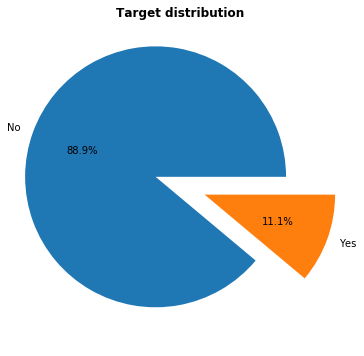

In [27]:
plt.figure(figsize=(6,6))
explode =(0.2,0.2)
plt.pie(train['choose'].value_counts(), labels= ['No','Yes'], autopct='%.1f%%',explode = explode)
plt.title("Target distribution", fontweight = 'bold')

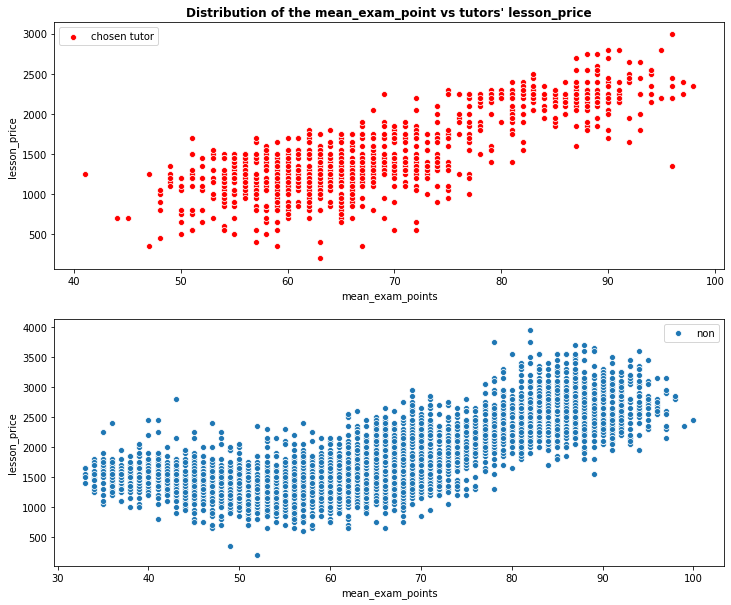

In [28]:
fig, ax = plt.subplots(nrows=2, ncols=1)
ax1, ax2 = ax
fig.set_size_inches(12,10)
sns.scatterplot(train[(train['choose']==1)]['mean_exam_points'], train[(train['choose']==1)]['lesson_price'], ax = ax1, label = 'chosen tutor', color = 'r' )
sns.scatterplot(train[(train['choose']==0)]['mean_exam_points'], train[(train['choose']==0)]['lesson_price'], ax = ax2, label = 'non' )
plt.subplots_adjust(hspace = 0.2)

plt.legend()
ax1.set_title("Distribution of the mean_exam_point vs tutors' lesson_price", fontweight = 'bold')
plt.show()

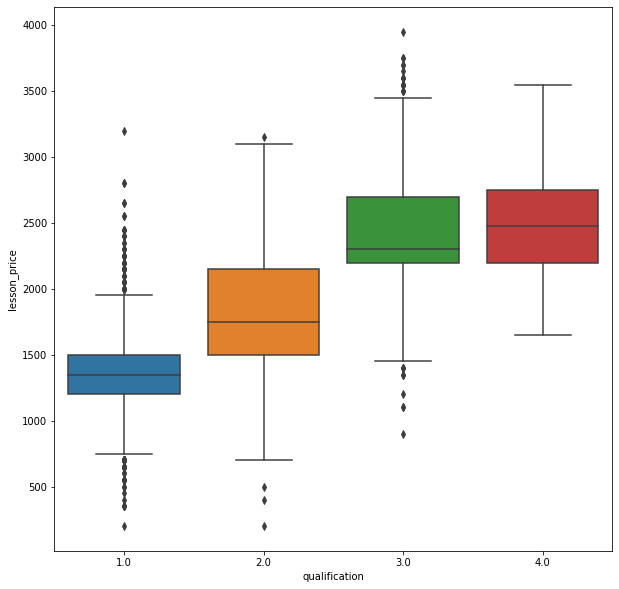

In [29]:
plt.figure(figsize=(10,10))
sns.boxplot(train.qualification, train.lesson_price)

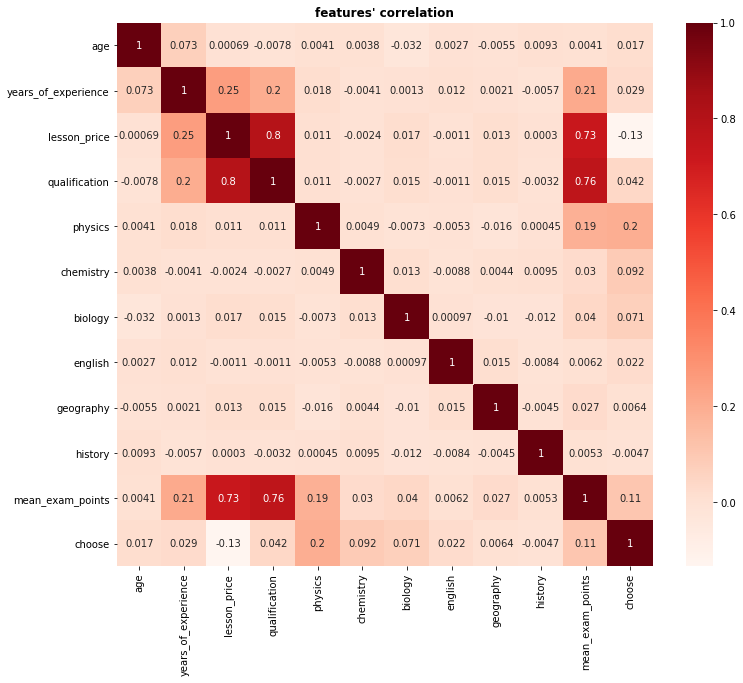

In [30]:
plt.figure(figsize=(12,10))
cor = train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.title("features' correlation", fontweight = 'bold')
plt.show()

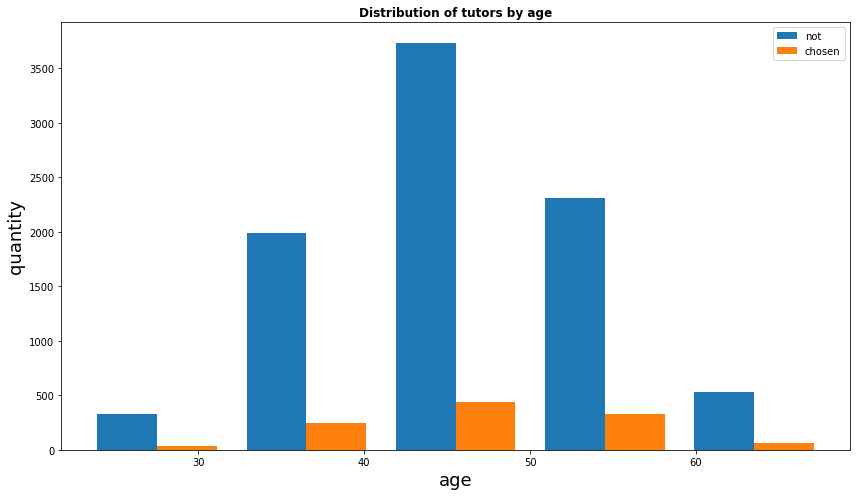

In [31]:
plt.figure(figsize=(12,7))
plt.hist([train[train['choose'] == 0 ]['age'], train[train['choose'] == 1 ]['age']], bins=5, label = ['not','chosen'])

plt.title('Distribution of tutors by age', fontweight = 'bold')
plt.xlabel('age', fontsize=18)
plt.ylabel('quantity', fontsize=18)
plt.tight_layout()
plt.legend()

In [32]:
#Eliminating outliers как и говорили сделал это до Piplene и Transformer ов
def qualification_outliers(train):
    for i in train['qualification'].unique():
        Q3 = train[(train['qualification']==i)]['lesson_price'].quantile(0.75)
        Q1 = train[(train['qualification']==i)]['lesson_price'].quantile(0.25)
        IQR = Q3 - Q1
        train[(train['qualification']==i)] = train[(train['qualification']==i)].query('lesson_price <= (@Q3 + 1.5 * @IQR)')
    train = train[train['lesson_price'].notna()]
    return train

In [33]:
train = qualification_outliers(train)

**3. Сделать feature engineering. При этом постарайтесь «завернуть» ваш код для преобразования данных в классы или функции (пример Transformer как в ноутбуке).**

### sklearn Transformers

In [34]:
def age_group(train) :
    
    if train["age"] <= 30 :
        return "age_0-30"
    elif (train["age"] > 30) & (train["age"] <= 40 ):
        return "age_30-40"
    elif (train["age"] > 40) & (train["age"] <= 50) :
        return "age_40-50"
    elif (train["age"] > 50) & (train["age"] <= 60) :
        return "age_50-60"
    elif train["age"] > 60 :
        return "age_60"

In [35]:
train["age"] = train.apply(lambda train:age_group(train), axis = 1)

In [36]:
#Separating catagorical and numerical columns
Id_col     = ['Id']
target_col = ["choose"]
cat_cols   = train.nunique()[train.nunique() < 10].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
num_cols   = [x for x in train.columns if x not in cat_cols + target_col + Id_col]

In [48]:
from sklearn.base import BaseEstimator, TransformerMixin
    

class ColumnSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.key]
    
class NumberSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    Use on numeric columns in the data
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[[self.key]]
    
class OHEEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key
        self.columns = []

    def fit(self, X, y=None):
        self.columns = [col for col in pd.get_dummies(X, prefix=self.key).columns]
        return self

    def transform(self, X):
        X = pd.get_dummies(X, prefix=self.key)
        test_columns = [col for col in X.columns]
        for col_ in test_columns:
            if col_ not in self.columns:
                X[col_] = 0
        return X[self.columns]

class AgeSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        if X[self.key] <= 30 :
            X[self.key] = X[self].apply(lambda self:"age_0-30", axis = 1)
            return X[self.key]
        elif (X[self.key] > 30) & (X[self.key] <= 40 ):
            X[self.key] = X[self].apply(lambda self:"age_30-40", axis = 1)
            return X[self.key]
        elif (X[self.key] > 40) & (X[self.key] <= 50) :
            X[self.key] = X[self].apply(lambda self:"age_40-50", axis = 1)
            return X[self.key]
        elif (X[self.key] > 50) & (X[self.key] <= 60) :
            X[self.key] = X[self].apply(lambda self:"age_50-60", axis = 1)
            return X[self.key]
        elif X[self.key] > 60 :
            X[self.key] = X[self].apply(lambda self:"age_60", axis = 1)
            return X[self.key]

In [45]:
cat_cols

['age',
 'qualification',
 'physics',
 'chemistry',
 'biology',
 'english',
 'geography',
 'history']

In [49]:
age = Pipeline([
                ('selector', AgeSelector(key='age')),
                ('ohe', OHEEncoder(key='age'))
     ])

In [50]:
age.fit(train)
age.transform(train)

TypeError: '<=' not supported between instances of 'str' and 'int'

**Pipeline**

In [ ]:
qualification = Pipeline([
                ('selector', ColumnSelector(key='qualification')),
                ('ohe', OHEEncoder(key='qualification'))
            ])
physics = Pipeline([
                ('selector', ColumnSelector(key='physics')),
                ('ohe', OHEEncoder(key='physics'))
            ])
chemistry = Pipeline([
                ('selector', ColumnSelector(key='chemistry')),
                ('ohe', OHEEncoder(key='chemistry'))
            ])
biology = Pipeline([
                ('selector', ColumnSelector(key='biology')),
                ('ohe', OHEEncoder(key='biology'))
            ])
english = Pipeline([
                ('selector', ColumnSelector(key='english')),
                ('ohe', OHEEncoder(key='english'))
            ])
geography = Pipeline([
                ('selector', ColumnSelector(key='geography')),
                ('ohe', OHEEncoder(key='geography'))
            ])
history = Pipeline([
                ('selector', ColumnSelector(key='history')),
                ('ohe', OHEEncoder(key='history'))
            ])

Теперь для вещественных переменных

In [ ]:
num_cols

In [ ]:
years_of_experience =  Pipeline([
                ('selector', NumberSelector(key='years_of_experience')),
                ('standard', StandardScaler())
            ])
lesson_price =  Pipeline([
                ('selector', NumberSelector(key='lesson_price')),
                ('standard', StandardScaler())
            ])
mean_exam_points =  Pipeline([
                ('selector', NumberSelector(key='mean_exam_points')),
                ('standard', StandardScaler())
            ])